In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches


# Carga de datos
### Carga de datos de las estaciones

In [50]:
##Carga de parametros


#Lectura de estaciones
columns =['Estación','VelViento','DirViento','PM10','Pm2.5']
data_estaciones = pd.read_csv('../estaciones.txt',header=None, names=columns)
data_estaciones

,Estación,VelViento,DirViento,PM10,Pm2.5
0,Guaymaral,VelViento,DirViento,PM10,Pm2.5
1,Suba,VelViento,DirViento,PM10,Pm2.5
2,Colina,VelViento,DirViento,PM10,Pm2.5
3,Bolivia,NaN,NaN,PM102,Pm2.5
4,Usaquén,VelViento,DirViento,PM10,Pm2.5
5,Las Ferias,VelViento,DirViento,PM10,Pm2.5
6,Fontibón,VelViento,DirViento,PM10,Pm2.5
7,Estación Movil Fontibón,NaN,NaN,PM10,Pm2.5
8,Centro de Alto Rendimiento,VelViento,DirViento,PM10,Pm2.5
9,Móvil Séptima,VelViento,DirViento,PM10,Pm2.5


### Carga de datos de polución

In [49]:
path = 'raw_data/'

df_PM10_Bol = pd.read_excel(path + '/Bolivia_PM10_22-01-2024.xlsx')
df_PM10_Bol

,Bolivia,Unnamed: 1
0,fecha hora,PM10
1,NaN,µg/m3
2,22-01-2024 01:00,25
3,22-01-2024 02:00,38
4,22-01-2024 03:00,35
5,22-01-2024 04:00,25
6,22-01-2024 05:00,22
7,22-01-2024 06:00,24
8,22-01-2024 07:00,38
9,22-01-2024 08:00,32


### Limpieza de datos

In [4]:
df_PM10_Bol.isnull().sum()

Bolivia       1
Unnamed: 1    0
dtype: int64

#### Relleno de los NaNs

In [6]:

# Rellenar los valores NaN con el valor anterior en la columna
df_PM10_Bol['column'] = df_PM10_Bol['column'].fillna(method='ffill')




KeyError: 'column'

### Analisis de datos

In [ ]:
#Lectura de datos por dia

#Lectura de datos por hora
data = 


NameError: name 'data' is not defined

#### Interpolación de datos

### Visualizacion de datos

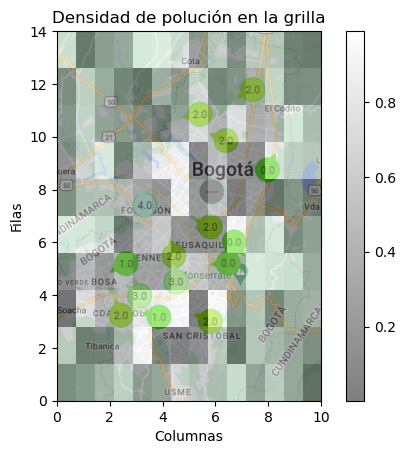

In [5]:

#@title Visualización de la grilla
def Mapa(data, map_path='../Map.png'):
    # Cargar la imagen de fondo
    background_image = mpimg.imread(map_path)




    # Crear el plot
    fig, ax = plt.subplots()

    # Mostrar la imagen de fondo
    ax.imshow(background_image, extent=[0, Lx, 0, Ly], aspect='auto')

    # Mostrar la grilla coloreada sobre la imagen de fondo
    # Ajustar alpha para hacer la grilla transparente
    cax = ax.imshow(data, cmap='gray', interpolation='nearest', extent=[0, Lx, 0, Ly], alpha=0.5)


    # Agregar una barra de colores para referencia
    plt.colorbar(cax)

    # Configurar etiquetas y título (opcional)
    plt.title('Densidad de polución en la grilla')
    plt.xlabel('Columnas')
    plt.ylabel('Filas')

    # Mostrar el plot
    plt.show()

Lx = 10
Ly = 14
# Crear una matriz de (Lx)x(Ly) con valores aleatorios entre 0 y 1
data = np.random.rand(Lx, Ly)
Mapa(data)

In [6]:
image_path = '../Map.png'
image = cv2.imread(image_path)

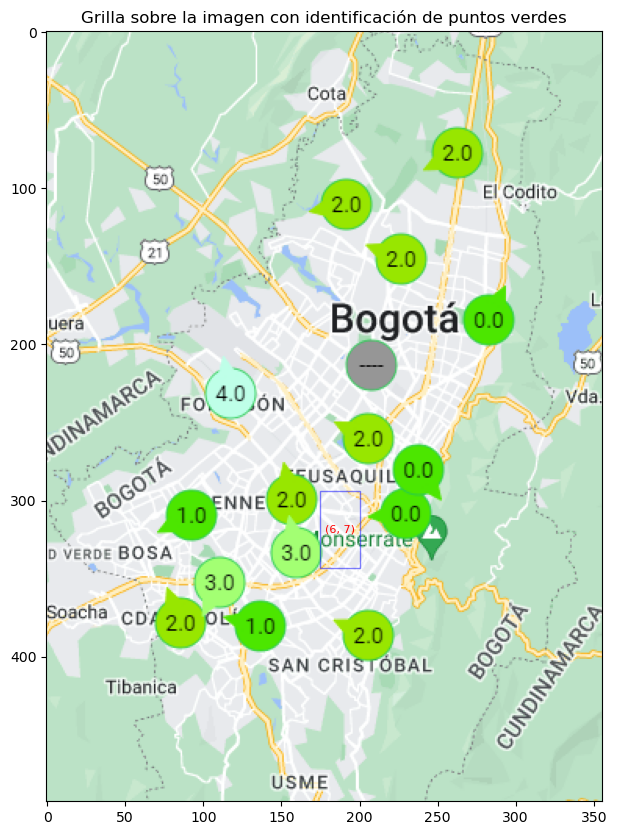

Estación en coordenadas de la imagen: (195, 323)


In [8]:
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convertir la imagen a espacio de color HSV
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Definir el rango de color verde en HSV
lower_green = np.array([35, 100, 100])
upper_green = np.array([85, 255, 255])

# Crear una máscara para los píxeles verdes
mask = cv2.inRange(image_hsv, lower_green, upper_green)

# Encontrar los contornos de las regiones verdes
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Dimensiones de la imagen
height, width, _ = image.shape

# Definir el tamaño de la grilla
grid_size = (10, 14)  # 10 filas y 14 columnas

# Tamaño de cada celda de la grilla
cell_height = height // grid_size[0]
cell_width = width // grid_size[1]

# Crear una figura para visualizar la imagen y la grilla
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(image_rgb)

# Función para detectar triángulos en los contornos
def detect_triangle(contour):
    epsilon = 0.04 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)
    return len(approx) == 3

# Crear una matriz para almacenar la grilla coloreada
colored_grid = np.zeros(grid_size)

# Lista para almacenar las posiciones de las estaciones
stations_positions = []

# Dibujar los contornos y encontrar las posiciones de los triángulos
for contour in contours:
    if detect_triangle(contour):
        # Obtener el centro del contorno
        M = cv2.moments(contour)
        if M['m00'] != 0:
            cx = int(M['m10'] / M['m00'])
            cy = int(M['m01'] / M['m00'])
            # Guardar la posición del triángulo
            stations_positions.append((cx, cy))
            # Determinar en qué celda de la grilla se encuentra el triángulo
            cell_x = cx // cell_width
            cell_y = cy // cell_height
            # Marcar la celda en la grilla
            colored_grid[cell_y, cell_x] = 1
            # Dibujar un círculo en el centro del contorno
            cv2.circle(image_rgb, (cx, cy), 5, (255, 0, 0), -1)

# Colorear la grilla sobre la imagen
for i in range(grid_size[0]):
    for j in range(grid_size[1]):
        if colored_grid[i, j] == 1:
            rect = patches.Rectangle((j * cell_width, i * cell_height), cell_width, cell_height, linewidth=1, edgecolor='b', facecolor='none', alpha=0.5)
            ax.add_patch(rect)
            # Anotar la posición en la celda
            plt.text(j * cell_width + cell_width / 2, i * cell_height + cell_height / 2, f'({i}, {j})', color='red', fontsize=8, ha='center', va='center')

# Mostrar la imagen con las posiciones de los triángulos y la grilla coloreada
plt.title('Grilla sobre la imagen con identificación de puntos verdes')
plt.show()

# Imprimir las posiciones de las estaciones
for pos in stations_positions:
    print(f'Estación en coordenadas de la imagen: {pos}')


In [23]:
#Cargar imagen
image_path = '../Map1.png'
image = cv2.imread(image_path)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Aplicar suavizado para mejorar la detección de círculos
image_blur = cv2.medianBlur(image_gray, 5)

# Definir el rango de valores de gris oscuro
lower_gray = 50
upper_gray = 200

# Crear una máscara para los píxeles oscuros
mask = cv2.inRange(image_blur, lower_gray, upper_gray)

# Aplicar la máscara a la imagen borrosa
masked_image = cv2.bitwise_and(image_blur, image_blur, mask=mask)

# Detectar círculos usando la transformada de Hough
circles = cv2.HoughCircles(masked_image, cv2.HOUGH_GRADIENT, dp=1.2, minDist=20,
                           param1=50, param2=30, minRadius=15, maxRadius=30)

# Verificar si se han detectado círculos
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    # Crear una matriz para almacenar la grilla coloreada
    grid_size = (10, 14)  # 10 filas y 14 columnas
    height, width, _ = image.shape
    cell_height = height // grid_size[0]
    cell_width = width // grid_size[1]
    colored_grid = np.zeros(grid_size)

    # Crear una figura para visualizar la imagen y la grilla
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(image_rgb)

    # Lista para almacenar las posiciones de las estaciones
    stations_positions = []

    # Procesar cada círculo detectado
    for (x, y, r) in circles:
        # Dibujar el círculo en la imagen
        cv2.circle(image_rgb, (x, y), r, (255, 0, 0), 4)
        # Dibujar el centro del círculo
        cv2.circle(image_rgb, (x, y), 2, (0, 255, 0), 3)
        # Guardar la posición del centro del círculo
        stations_positions.append((x, y))
        # Determinar en qué celda de la grilla se encuentra el centro del círculo
        cell_x = x // cell_width
        cell_y = y // cell_height
        # Marcar la celda en la grilla
        colored_grid[cell_y, cell_x] = 1

    # Colorear la grilla sobre la imagen
    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            if colored_grid[i, j] == 1:
                rect = patches.Rectangle((j * cell_width, i * cell_height), cell_width, cell_height, linewidth=1, edgecolor='b', facecolor='none', alpha=0.8)
                ax.add_patch(rect)
                # Anotar la posición en la celda
                plt.text(j * cell_width + cell_width / 2, i * cell_height + cell_height / 2, f'({i}, {j})', color='red', fontsize=8, ha='center', va='center')
            else:
                rect = patches.Rectangle((j * cell_width, i * cell_height), cell_width, cell_height, linewidth=1, edgecolor='r', facecolor='none', alpha=0.3)
                ax.add_patch(rect)

    # Mostrar la imagen con las posiciones de los círculos y la grilla coloreada
    plt.title('Grilla sobre la imagen con identificación de círculos')
    plt.show()

    # Imprimir las posiciones de las estaciones
    for pos in stations_positions:
        print(f'Estación en coordenadas de la imagen: {pos}')
else:
    print("No se detectaron círculos.")


No se detectaron círculos.


Estación en coordenadas de la imagen: (0, 12)
Estación en coordenadas de la imagen: (1, 9)
Estación en coordenadas de la imagen: (1, 10)
Estación en coordenadas de la imagen: (2, 7)
Estación en coordenadas de la imagen: (2, 13)
Estación en coordenadas de la imagen: (3, 6)
Estación en coordenadas de la imagen: (3, 10)
Estación en coordenadas de la imagen: (4, 6)
Estación en coordenadas de la imagen: (4, 10)
Estación en coordenadas de la imagen: (4, 11)
Estación en coordenadas de la imagen: (5, 5)
Estación en coordenadas de la imagen: (5, 8)
Estación en coordenadas de la imagen: (5, 11)
Estación en coordenadas de la imagen: (6, 6)
Estación en coordenadas de la imagen: (6, 8)
Estación en coordenadas de la imagen: (7, 5)
Estación en coordenadas de la imagen: (7, 7)
Estación en coordenadas de la imagen: (7, 10)
Estación en coordenadas de la imagen: (8, 8)


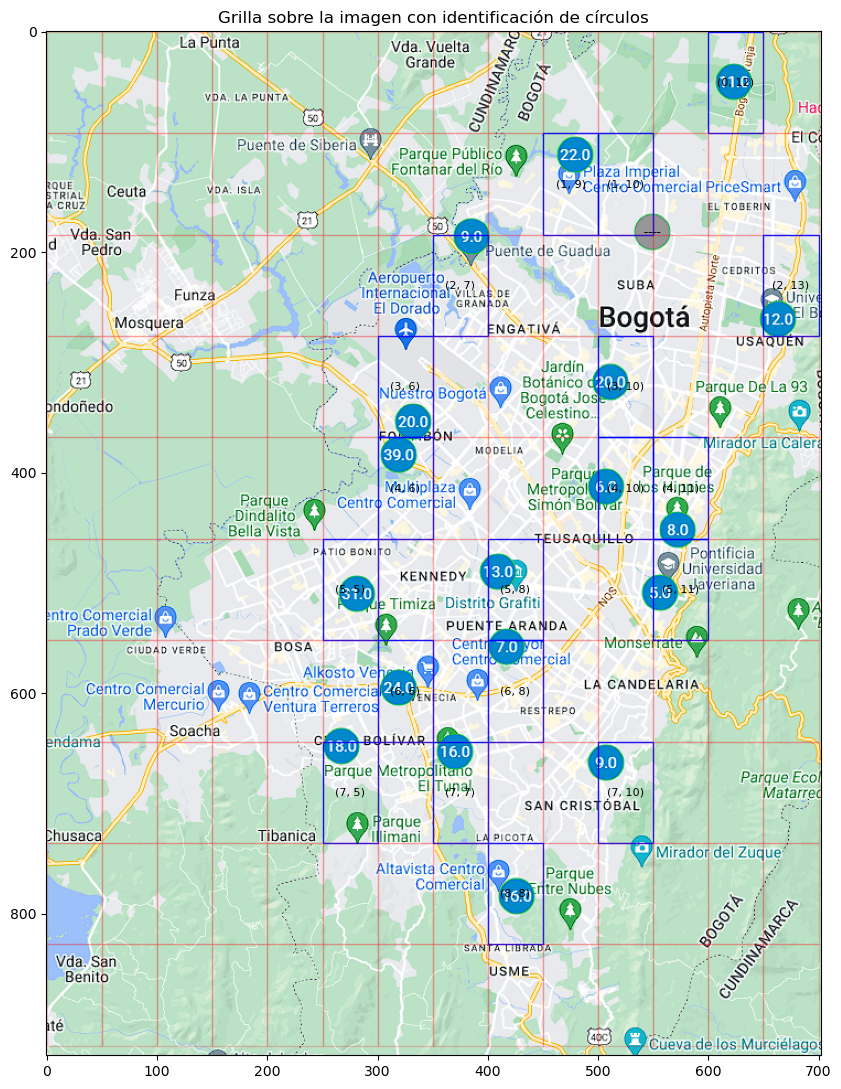

In [47]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Cargar la imagen
image_path = '../Map1.png'
image = cv2.imread(image_path)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Aplicar suavizado para mejorar la detección de círculos
image_blur = cv2.medianBlur(image_gray, 5)

# Definir el rango de valores de gris oscuro
lower_gray = 100
upper_gray = 255

# Crear una máscara para los píxeles oscuros
mask = cv2.inRange(image_blur, lower_gray, upper_gray)

# Aplicar la máscara a la imagen borrosa
masked_image = cv2.bitwise_and(image_blur, image_blur, mask=mask)

# # Mostrar la imagen enmascarada
# plt.figure(figsize=(10, 10))
# plt.imshow(masked_image, cmap='gray')
# plt.title('Imagen enmascarada')
# plt.show()

# Detectar círculos usando la transformada de Hough
circles = cv2.HoughCircles(masked_image, cv2.HOUGH_GRADIENT, dp=1.2, minDist=20,
                           param1=50, param2=30, minRadius=15, maxRadius=25)

# Verificar si se han detectado círculos
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    # Crear una matriz para almacenar la grilla coloreada
    grid_size = (Lx, Ly)  # 10 filas y 14 columnas
    height, width, _ = image.shape
    cell_height = height // grid_size[0]
    cell_width = width // grid_size[1]
    colored_grid = np.zeros(grid_size)

    # Crear una figura para visualizar la imagen y la grilla
    fig, ax = plt.subplots(figsize=(Lx, Ly))
    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Lista para almacenar las posiciones de las estaciones
    stations_positions = []

    # Procesar cada círculo detectado
    for (x, y, r) in circles:
        # Dibujar el círculo en la imagen
        cv2.circle(image, (x, y), r, (255, 0, 0), 4)
        # Dibujar el centro del círculo
        cv2.circle(image, (x, y), 2, (0, 255, 0), 3)
        # Guardar la posición del centro del círculo
        stations_positions.append((x, y))
        # Determinar en qué celda de la grilla se encuentra el centro del círculo
        cell_x = x // cell_width
        cell_y = (height - y) // cell_height  # Invertir la coordenada y
        # Marcar la celda en la grilla
        colored_grid[cell_y, cell_x] = 1

    # Colorear la grilla sobre la imagen
    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            if colored_grid[i, j] == 1:
                rect = patches.Rectangle((j * cell_width, i * cell_height), cell_width, cell_height, linewidth=1, edgecolor='b', facecolor='none', alpha=0.9)
                ax.add_patch(rect)
                # Anotar la posición en la celda
                plt.text(j * cell_width + cell_width / 2, i * cell_height + cell_height / 2, f'({i}, {j})', color='black', fontsize=8, ha='center', va='center', alpha=1)
                print(f'Estación en coordenadas de la imagen: {i,j}')
            else:
                rect = patches.Rectangle((j * cell_width, i * cell_height), cell_width, cell_height, linewidth=1, edgecolor='r', facecolor='none', alpha=0.2)
                ax.add_patch(rect)
            

    # Mostrar la imagen con las posiciones de los círculos y la grilla coloreada
    plt.title('Grilla sobre la imagen con identificación de círculos')
    plt.show()

else:
    print("No se detectaron círculos.")


In [ ]:
# Mostrar la grilla donde hay posiciones
# Relacionarlas con las estaciones reales
# Asignar el valor del data set